In [1]:
# ###################################################
# Change current directory to the root of the project
import os
from pathlib import Path
current_dir = Path(os.getcwd())
os.chdir(current_dir.parents[1])
# ###################################################

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cir.benchmarks.cir_utils import get_pmf

sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette("deep"))

In [3]:
sns.set_theme()
output_path = "./"

def sample_and_plot(
        n_experiences = 20,
        n_classes = 100,
        n_different_samples = 5,
        probs=None,
        title="Title"
):
    # Data
    data = {"experiences": list(range(n_experiences)),
            "probs": probs
            }

    for i in range(n_different_samples):
        samples = np.random.choice(list(range(0, n_experiences)), n_classes,
                                   p=probs, replace=True)
        data[f"samples_{i}"] = samples

    # Plot
    fig, ax = plt.subplots(nrows=1, ncols=n_different_samples+1, figsize=(15, 3))
    plt.suptitle(title, fontsize=15)

    sns.lineplot(data=data, x="experiences", y="probs", ax=ax[0])
    ax[0].set(xlabel="Experience", ylabel="Probability")
    ax[0].set(xlim=(0, n_experiences))

    for i in range(n_different_samples):
        sns.histplot(data=data, x=f"samples_{i}", bins=n_classes,
                     ax=ax[i+1], binwidth=1.0, discrete=True, binrange=(0, n_experiences))
        ax[i+1].set(xlabel="Experience", ylabel="Number of Classes")
    plt.tight_layout()

## Geometric

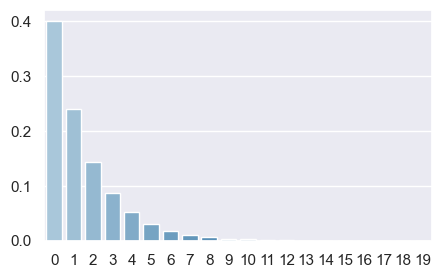

In [4]:
n_experiences = 20
n_classes = 100
n_different_samples = 5


p = 0.4
title = rf"Geometric - $p={p}$"
dist = {"n_entities": n_experiences, "dist_type": "geometric", "p": p}
probs = get_pmf(**dist)
ax, fig = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.barplot(x=list(range(len(probs))), y=probs, palette="Blues_d")

plt.savefig(os.path.join(output_path, f"transition_3.pdf"))